In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).

%matplotlib inline
import matplotlib.pyplot as plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Linear Regression through Normal equation
## Generate Linear Looking data

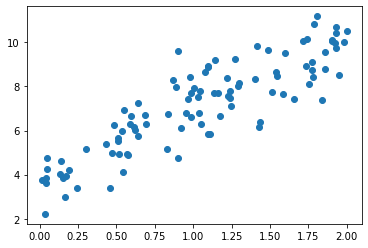

In [4]:

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plot.scatter(X, y )

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.86024567],
       [3.14205   ]])

## Now let's make predictions using Theta Best

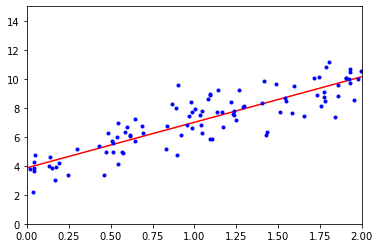

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
plot.plot(X_new, y_predict, "r-")
plot.plot(X, y, "b.")
plot.axis([0, 2, 0, 15])
plot.show()

## Using Scikit learn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86024567]), array([[3.14205]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.86024567],
       [10.14434566]])

# Gradient Descent
## Trying out Gradient Descent

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.86024567],
       [3.14205   ]])

## Let's try plotting for different learning rates

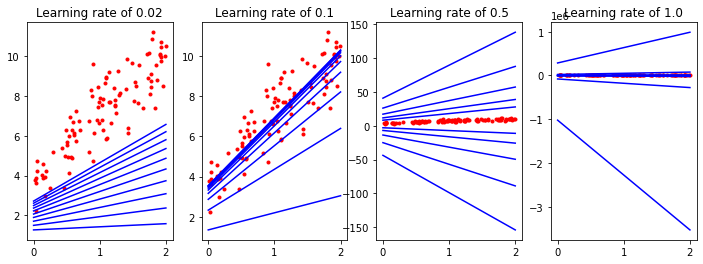

In [17]:
def get_coef_for_learning_rate(eta):
    theta = np.random.randn(2, 1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        yield theta

y_list = []
n_iterations = 10

figure, axis = plot.subplots(1, 4)
plot_number = 0
for eta in [0.02, 0.1, 0.5, 1.0]:
    axis[plot_number].plot(X, y, 'r.')
    generator =  get_coef_for_learning_rate(eta)
    while True:
        try:
            theta = next(generator)
            y_new = X_new_b.dot(theta)
            axis[plot_number].plot(X_new, y_new, 'b-')
            axis[plot_number].set_title('Learning rate of '+ str(eta))
        except StopIteration:
            break
    plot_number += 1
figure.set_size_inches(12,4)
figure.show()
    